<div style="display: flex; align-items: center;">
    <div style="flex: 1;">
        黃琪婕 ChiChieh Huang <br>
        Sr. Data Scientist <br>
        M: cch.chichieh@gmail.com <br>
        P: +886 956-101-395 <br>
    </div>
    <div style="flex: 1; text-align: right;">
        <img src="./png/黃琪婕 照片.jpg" alt="您的照片" style="border-radius: 50%; width: 100px; height: 100px;">
    </div>
</div>

------

# 1. 下載資料
- 主要資料為：[臺北捷運各站分時進出量統計](https://data.taipei/dataset/detail?id=1d71c478-205f-42c5-8386-35f86d74fdd1)  
- 內容：臺北捷運每日每小時的OD流量  
- 時間涵蓋：2017-01-01 到 2023-10-31，共 82 個檔案
  
下載後會得到"臺北捷運每日分時各站OD流量統計資料.csv"，紀錄每年各月份的 API，可以直接點擊下載，  
但由於量太多各別點擊耗時，我使用 GET 將其各別下載，並存在指定路徑中。

In [1]:
from my_func import *
csv_file_path = "臺北捷運每日分時各站OD流量統計資料.csv" 
# download_files_from_csv(csv_file_path, destination_folder = "data/") 

# 2. 資料介紹
從[臺北捷運各站分時進出量統計](https://data.taipei/dataset/detail?id=1d71c478-205f-42c5-8386-35f86d74fdd1) 下載的資料總共有 5 個欄位，  
範例如以下 table，這邊讀取 201701 的為範例：

In [2]:
example = pd.read_csv('M:/gogoro/raw_data/file_201701.csv')
example.head()

日期  時段    進站    出站  人次
0  2017-01-01   0  松山機場  松山機場   0
1  2017-01-01   0  松山機場  中山國中   0
2  2017-01-01   0  松山機場  南京復興   0
3  2017-01-01   0  松山機場  忠孝復興   0
4  2017-01-01   0  松山機場    大安   0

# 3. 各變數的特徵
接著來看 5 個欄位變數各自的分布與特徵，  
由於資料量非常大，我選 2017 年的資料做為代表。  

### 3.1 日期
    - 進站日期
    - 格式：YYYY/M/D
    - 2017-01-01 到 2023-10-31 
    - 共計 2495 天，7 年
### 3.2 時段
    - 進站小時
    - 格式：hh(24小時)
    
### 3.3 進站 
    - 進站的捷運站
    - 以 2017 年的資料來看，總計有 108 獨特車站
    - 之後成長為 119 個獨特車站

### 3.4 出站
    - 出站的捷運站
    - 與進站一致，總計有 108 獨特車站
    - 之後成長為 119 個獨特車站
   
首先看一下每年的捷運站數目是否有變化。  
可以從圖上看到，201701 時只有 108 個獨特車站，到了 202001 時成長為 119 個，  
由數據可以看出，新增的車站為 環狀線 的 11 個車站。

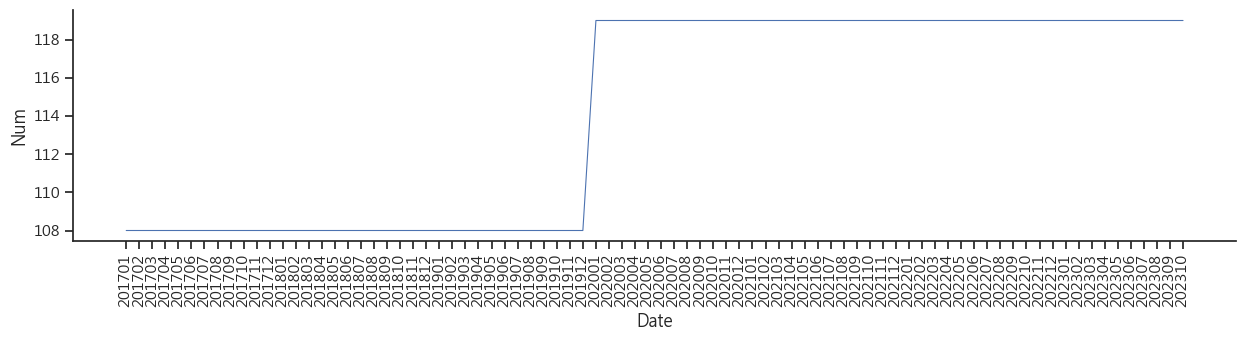

In [2]:
# station_count = count_station_number_by_yearmo("M:/gogoro/raw_data") # 從原始數據讀取後計算，耗時 5m40s
# plot_station_count(station_count)

另外因為原始數據沒有提供每個車站的路線所屬，如文湖線、新店線等，  
因此我從 [台北捷運API-捷運路線資料](https://www.metro.taipei/cp.aspx?n=BDEB860F2BE3E249) 取得以下 2 種資料
1. 臺北捷運車站出入口座標
    - CSV
    - 紀錄各個捷運站出口的座標(經度，緯度)
2. 捷運營運路線車站基本資料  
    - JSON
    - 紀錄捷運線的所屬線路、線路名稱、線路順序等。
    - 共計有 6 條捷運路線。
    - 需要下載兩筆，台北捷運與新北捷運(環狀線)。  
  
一個捷運站有需多出口，因此會有複數個座標，我這邊取平均值取得每個捷運站點的獨特座標。  
而捷運營運路線車站基本資料的 2 個資料是 JSON 檔，我首先將其處理成 CSV 以利之後處理或合併方便。  
之後合併兩個資料，並使用 folium 套件將每個捷運站點的地理位置與不同路線行車路徑繪製在地圖上。  

需注意 [臺北捷運各站分時進出量統計](https://data.taipei/dataset/detail?id=1d71c478-205f-42c5-8386-35f86d74fdd1) 的車站與上面兩個資料的車站名稱不同，有以下 2 點不同  
1. 前者 '板橋Y', '板橋BL'； 後者為 '板橋'
2. 前者 '大橋頭站'； 後者為 '大橋頭'

In [3]:
# 將 JSON 轉成 CSV 儲存
# json_file_path = 'M:/gogoro/data/捷運路線圖_臺北捷運.json'
# csv_file_path = 'M:/gogoro/data/捷運路線圖_臺北捷運.csv'
# convert_json_to_csv(json_file_path, csv_file_path)

# json_file_path = 'M:/gogoro/data/捷運路線圖_新北捷運.json'
# csv_file_path = 'M:/gogoro/data/捷運路線圖_新北捷運.csv'
# convert_json_to_csv(json_file_path, csv_file_path)

MRT_info = process_and_merge_MRT_info('M:/gogoro/data/臺北捷運車站出入口座標.csv', 'M:/gogoro/data/捷運路線圖_臺北捷運.csv', 'M:/gogoro/data/捷運路線圖_新北捷運.csv')
MRT_info.head()

捷運站名稱         緯度          經度  Sequence Station ID Station Name (Zh-TW)  \
2      七張  24.975967  121.542855         1        G03                   七張   
184   小碧潭  24.972498  121.529923         2       G03A                  小碧潭   
42   亞東醫院  24.998687  121.452613         1       BL05                 亞東醫院   
194    府中  25.008864  121.459183         2       BL06                   府中   
290    板橋  25.014339  121.463279         3       BL07                   板橋   

        Station Name (En) Line Number Line ID Route ID  Direction  \
2                 Qizhang           G       G      G-3          0   
184             Xiaobitan           G       G      G-3          0   
42   Far Eastern Hospital          BL      BL     BL-2          0   
194               Fuzhong          BL      BL     BL-2          0   
290               Banqiao          BL      BL     BL-2          0   

            Source Update Time                Update Time  Version ID  \
2    2020-01-31T14:00:00+08:00  2020-05-20T12:00:00+08:00           2   
184  2020-01-31T14:00:00+08:00  2020-05-20T12:00:00+08:00           2   
42   2020-01-31T14:00:00+08:00  2020-05-20T12:00:00+08:00           2   
194  2020-01-31T14:00:00+08:00  2020-05-20T12:00:00+08:00           2   
290  2020-01-31T14:00:00+08:00  2020-05-20T12:00:00+08:00           2   

    Route Name (Zh-TW)                                    Route Name (En)  
2               七張－小碧潭                                Qizhang - Xiaobitan  
184             七張－小碧潭                                Qizhang - Xiaobitan  
42          亞東醫院－南港展覽館  Far Eastern Hospital - Taipei Nangang Exhibiti...  
194         亞東醫院－南港展覽館  Far Eastern Hospital - Taipei Nangang Exhibiti...  
290         亞東醫院－南港展覽館  Far Eastern Hospital - Taipei Nangang Exhibiti...

In [4]:
plot_map(MRT_info=MRT_info)

### 3.5 人次
    - 該時段該OD旅次搭乘的人數  
    - 我使用上面的 example(201701) 來繪製 boxplot 與 hist 發現到，0 的部分佔非常多，整體分布也大多集中在 0。
    - 因此之後可以結合其他 X 再查看其細部趨勢。

由於連續型的變數只有 '人次' ，因此我先將 '人次' 視為 Y，去探討 '人次' 與其他 X 與其的關聯性。

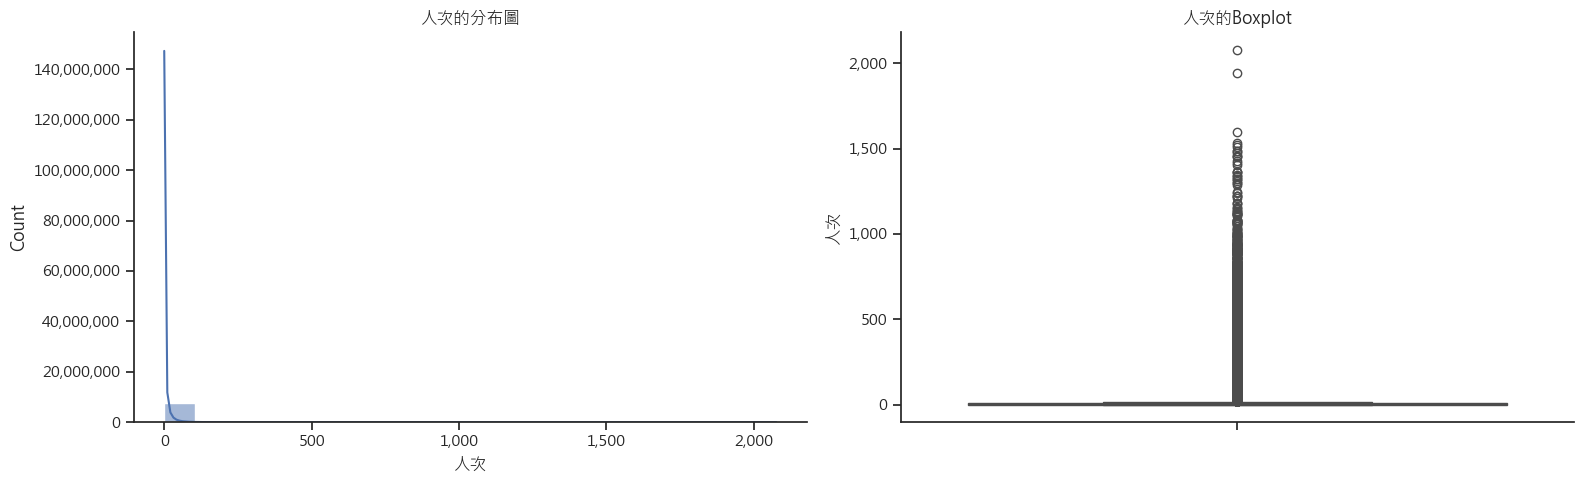

In [5]:
plot_visitor(example)

# 4. Y(人次) 與 進出站 的趨勢
在上述 進出站 的分析中，我們得知捷運原本為 108 條線路，在 202001 新增 11 條環狀線路，  
而結合了外部資料，我們發現含環狀線共計可分為 6 條線路。   

接著我們來看一每個車站的人次分布，我們先將車站的資訊與線路資訊結合。  
這邊有滿多細節要處理的，細節可以參考 function 的過程。

In [6]:
# raw_data_path = 'M:/gogoro/raw_data/'
# merged_to_daily(raw_data_path, group=['日期', '進站'], destination_folder = 'M:/gogoro/data/', file_name='daily_進站_人次.csv') # 6m45s

# 讀取
daliy_entry = pd.read_csv('M:/gogoro/data/daily_進站_人次.csv')
daliy_entry['日期'] = pd.to_datetime(daliy_entry['日期'], format='%Y-%m-%d')
daliy_entry_MRT = merged_MRT_info_with_ori_data(daliy_entry, MRT_info) # 處理車站名稱與顏色訊息
daliy_entry_MRT.head()

日期    進站     人次 Line IDs
0 2017-01-01  BL板橋  42135       BL
1 2017-01-02  BL板橋  37391       BL
2 2017-01-03  BL板橋  35362       BL
3 2017-01-04  BL板橋  35019       BL
4 2017-01-05  BL板橋  35306       BL

然後我們繪製每個車站的人次的 barplot 與 boxplot，並依照線路上色。  
如果一個車站點屬於 2 種線路以上，我簡單選取其為第一種。  

- 第一張圖 barplot  
我將 7 年的資料依據車站做加總，由圖上可以看到，  
車站總人次第一名的為台北車站、其次為西門、再來是市政府，皆是藍線的車站。  
環狀線的車站人次大多很低，除了大坪林站外，但大坪林同時也是綠線的。  

- 第二張是 boxplot  
我繪製每個車站每天人次的 boxplot，基本上與 barplot 的資訊一致，  
每天車站平均人次第一名的為台北車站、其次為西門、再來是市政府，皆是藍線的車站。  
台北車站的每天的人次差異非常大，而藍線與紅線的車站比較容易出現差異很大的 outlier。    

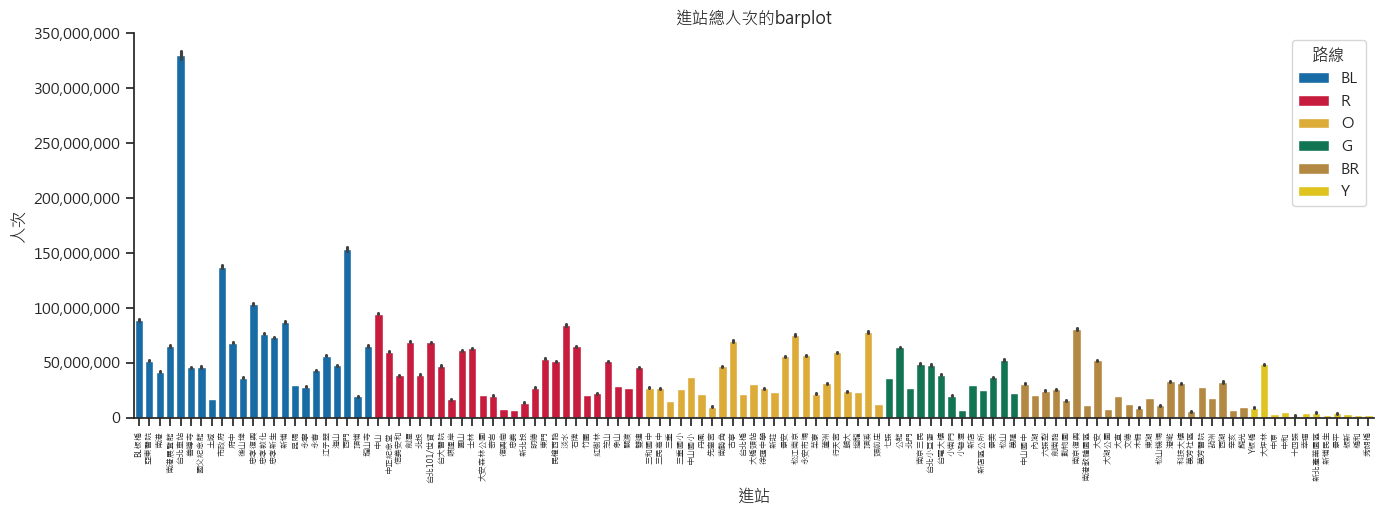

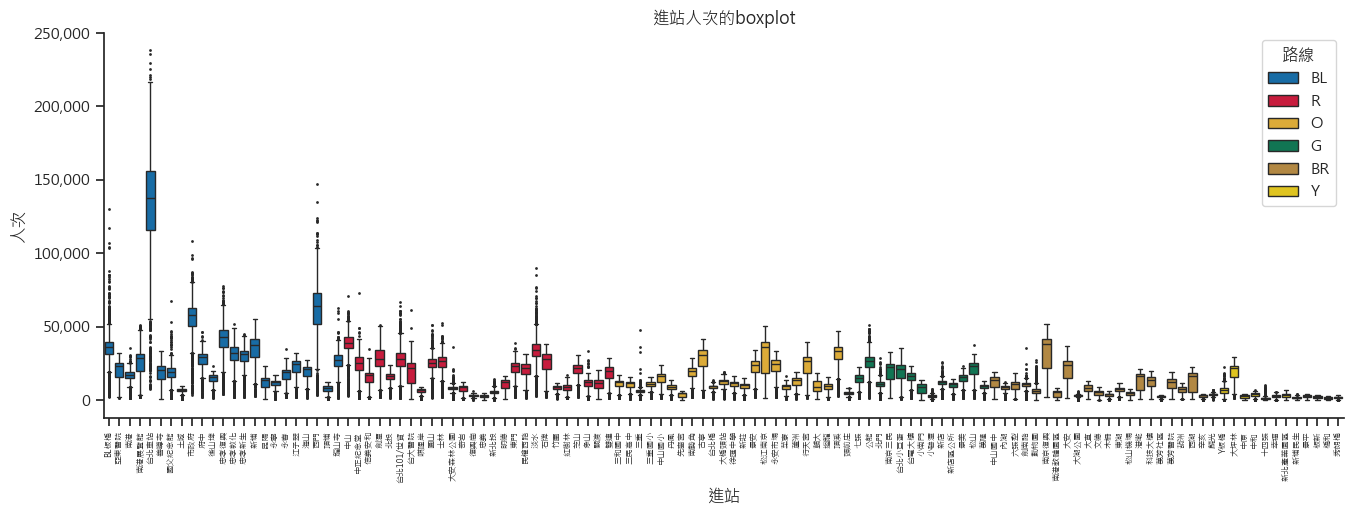

In [7]:
plot_station_visitor(daliy_entry_MRT)

由上面的推論我覺得車站路線是一個有用的指標，  
因此我們再細看各路線的 boxplot。
如果一個捷運站點有屬於 2 種線路以上，我簡單選取其為第一種。
  
由結果可以看到，7年內藍色車站的總人次最高，其次為紅色車站。  
但以每天平均值來看，綠色車站的平均人次最高。

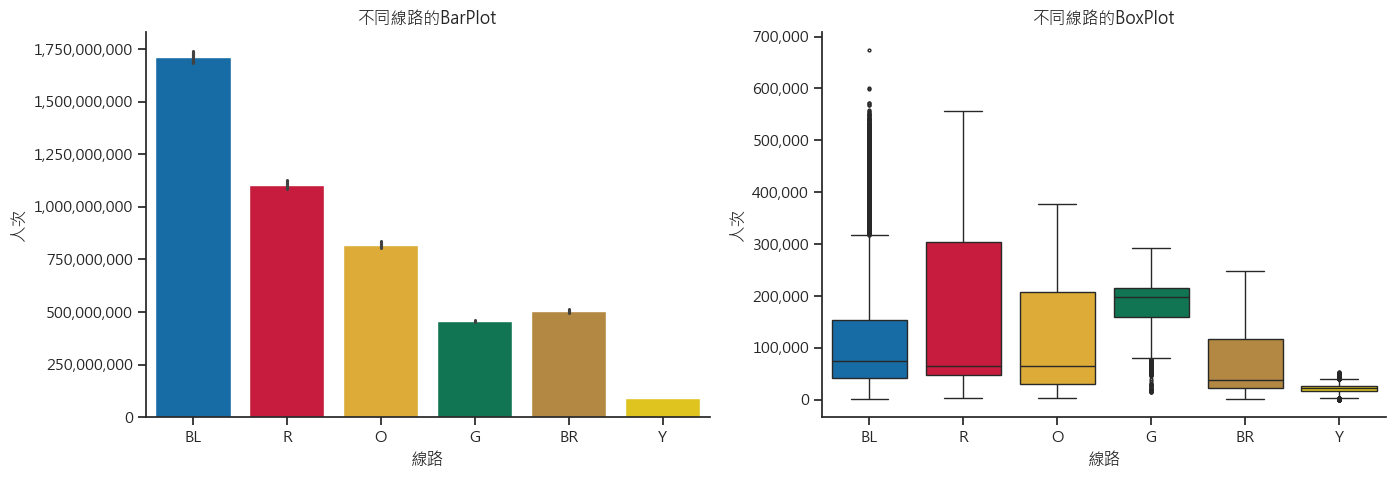

<Figure size 1600x500 with 0 Axes>

In [8]:
daliy_path = daliy_entry_MRT.groupby(['日期', 'Line IDs'], as_index=False)['人次'].agg('sum')
daliy_path['Line ID'] = daliy_path['Line IDs'].apply(lambda x: x.split(',')[0])
plot_path_visitor(daliy_path)

接著我使用 ANOVA 探討不同路線的每天平均人次是否有差異，  
根據執行的ANOVA結果，我們發現了不同組別之間的統計上的顯著差異（F-statistic: 1209.165, p-value: 0.0）。  
這表示平均值之間存在差異，但無法確定哪些組之間存在差異。因此，我們執行了事後檢定（Tukey-Kramer）以進一步瞭解這些差異。
  
由事後檢定的結果可以看到，每個兩兩比對都達到顯著差異，  
可以推論不同車站每天的平均人次都具有差異，是一個值得使用的變數。

In [6]:
group_columns = ['Line ID']
for group_column in group_columns:
    # 創建 AnovaAnalyzer class
    analyzer = AnovaAnalyzer(daliy_path, value_column='人次', group_column=group_column)
    analyzer.perform_anova()
    print(f"{group_column} 結果:")
    analyzer.display_result()
    analyzer.perform_posthoc()
    analyzer.display_posthoc()

Line ID 結果:
F-statistic: 1209.1648109358323
P-value: 0.0
統計上有顯著差異，我們拒絕虛無假設
事後檢定結果:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
    BL     BR  -69955.6703   0.0  -74617.8924  -65293.4482   True
    BL      G    45748.348   0.0   38755.0148   52741.6811   True
    BL      O  -27731.1955   0.0  -32393.4176  -23068.9734   True
    BL      R   10307.4643   0.0    5645.2422   14969.6864   True
    BL      Y -114146.0765   0.0 -119999.0856 -108293.0673   True
    BR      G  115704.0183   0.0  108332.3979  123075.6387   True
    BR      O   42224.4748   0.0    37011.952   47436.9976   True
    BR      R   80263.1347   0.0   75050.6119   85475.6574   True
    BR      Y  -44190.4061   0.0  -50490.5486  -37890.2637   True
     G      O  -73479.5435   0.0  -80851.1639  -66107.9231   True
     G      R  -35440.8836   0.0   -42812.504  -28069.2632 

# 5. Y(人次) 與 區段 的趨勢
接著我們來細看台北捷運 24 小時的人次趨勢。  
  
首先看到7年中每天 24 小時人次的分布。
由圖上可以看到，人次在 7-9 點與 17-19 點有兩個高峰，而 17-19 點較 7-9 點高。  
而每日 8 點與 18 點為人潮最高峰點，其中又以 18 點為人次的最多的時段。  
而 2 點的地方有一個異常的高峰，推測是跨年導致。  

In [2]:
# raw_data_path = 'M:/gogoro/raw_data/'
# merged_to_daily(raw_data_path, group=['時段', '進站'], destination_folder = 'M:/gogoro/data/', file_name='hour_進站_人次.csv') # 5m56s
# merged_to_daily(raw_data_path, group=['日期', '時段'], destination_folder = 'M:/gogoro/data/', file_name='daily_hour_人次.csv') # 4m40s
# merged_to_daily(raw_data_path, group=['日期', '時段', '進站'], destination_folder = 'M:/gogoro/data/', file_name='daily_hour_進站_人次.csv') # 7m54s

daily_hour = pd.read_csv('M:/gogoro/data/daily_hour_人次.csv')

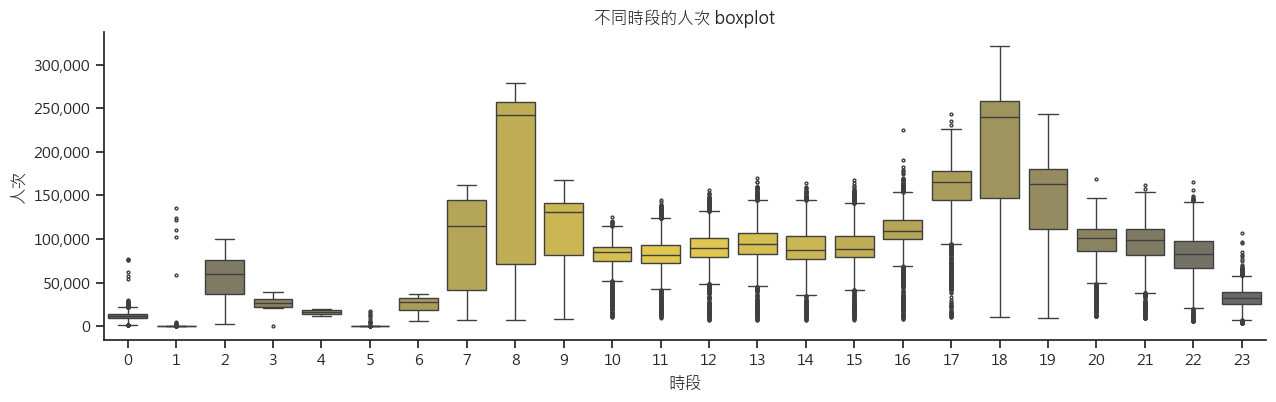

In [3]:
plot_hour_visitor(daily_hour)

接著看不同年的 24 小時分布是否有差異，由各年份 24 小時的小提琴圖可以看到，  
2017 - 2020 的趨勢都差不多，而 2021 則是明顯比其它年厚，在低人次的地方分布較多，這邊先猜測是疫情的影響，後續會進一步探討。    
  
另外所有年份都可以看出，兩個高峰 7-9 與 17-19 有兩個集中的趨勢，  
分別在 200,000-300,000 之間與 0-100,000 之間，推測是假日所帶來的差異，在後續也會探討。

<Figure size 1400x1000 with 0 Axes>

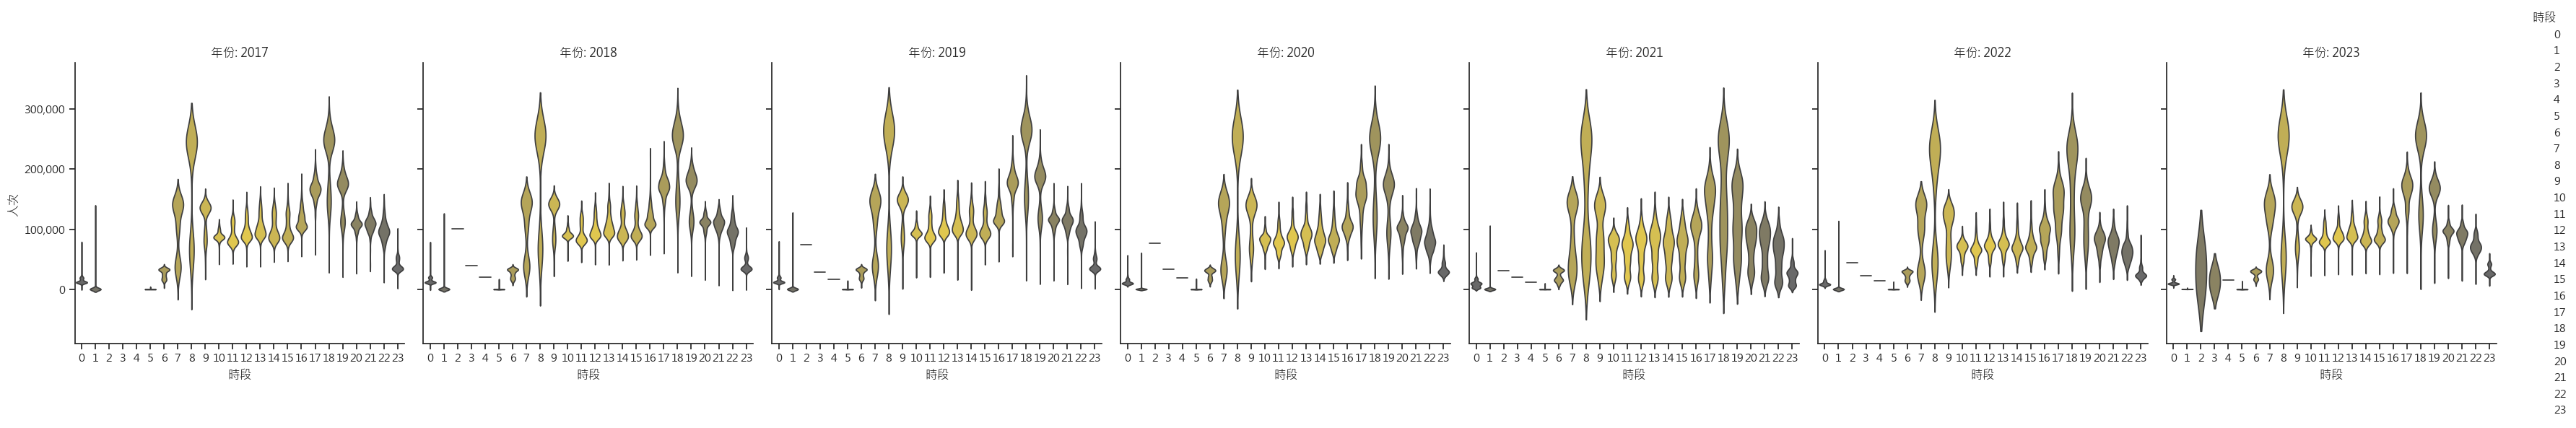

In [4]:
daily_hour['日期'] = pd.to_datetime(daily_hour['日期'], format='%Y-%m-%d')
daily_hour['year'] = daily_hour['日期'].dt.year
plot_hour_visitor(daily_hour, by_year=True)

另外不同車站的 24 小時趨勢都滿不一樣的，  
我這邊以進站為主去畫圖，因此可以看出那些車站是居住區，那些是商業區。  
- 居住區的車站趨勢會是早上 7-9 有明顯的高峰，而 17-19 則不太明顯，這暗示著早上有許多人潮從這個地方出發，如南勢角。
- 商業區則剛好相反過來，早上 7-9 不會有明顯高峰，而人次會隨著時間便晚而增加，有些在 17-19 也會有明顯高峰，如中山、南港軟體園區  
- 也有類似混和區的，趨勢與全部的平均類似，7-9 與 17-19 皆有高峰，如大坪林。
- 另外我列出了'台北101/世貿'，因為其在 2 點有個高峰，推測是跨年人潮。

由以上分析可以推論，區域為商業區或居住區應為一個有效的解釋變數，  
因此未來可以加入各區居住人口與商業人口比率來捕捉這個訊號。  

我有把所有的車站(進站) 24 小時的 boxplot 都輸出，存在 station_24hour_plot/ 中，有興趣可以查看。  

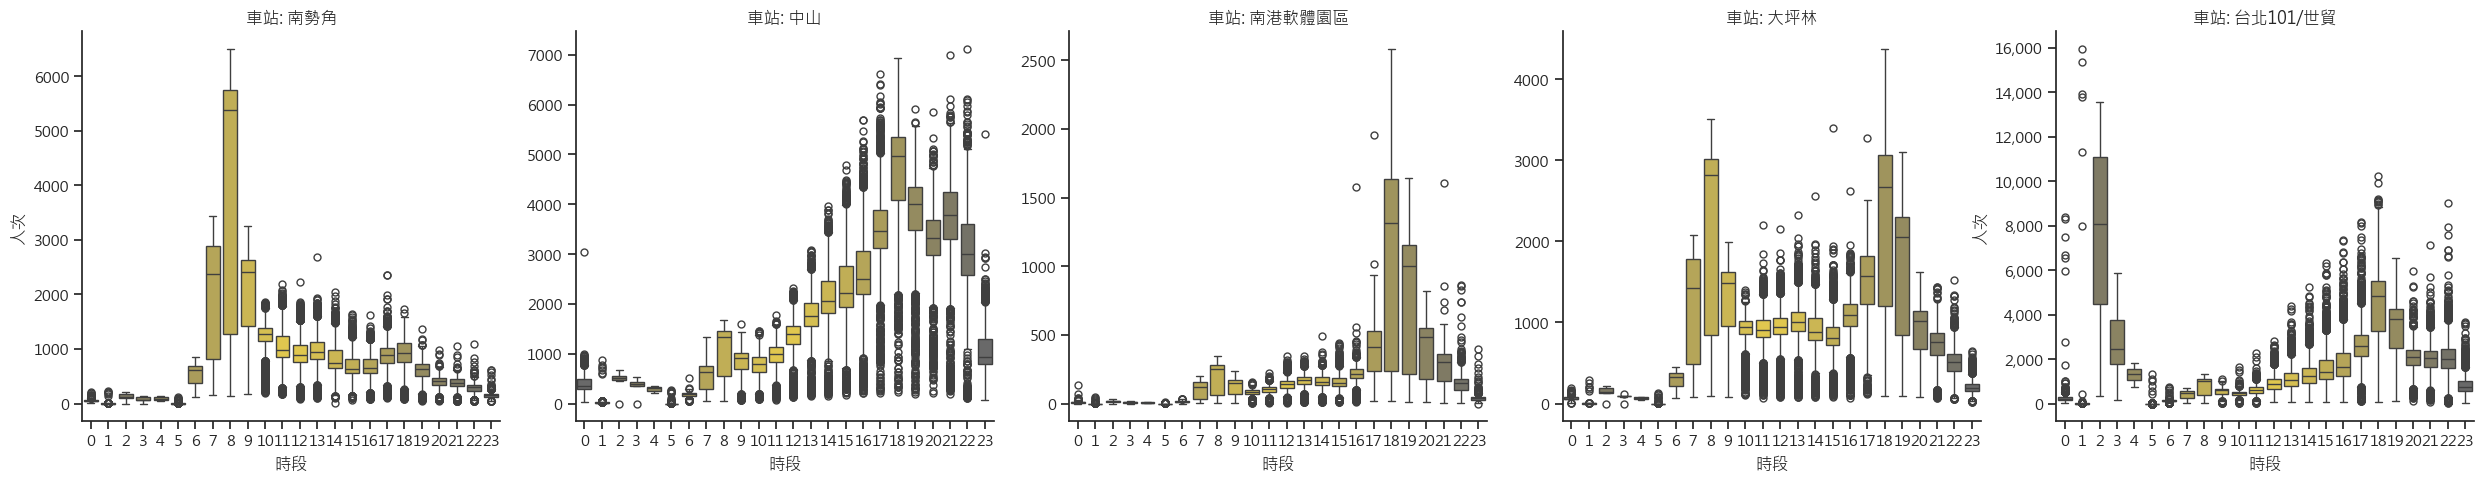

In [5]:
# merged_to_daily(raw_data_path, group=['日期', '時段', '進站'], destination_folder = 'M:/gogoro/data/', file_name='daily_hour_進站_人次.csv') # 7m54s
daily_hour_station = pd.read_csv('M:/gogoro/data/daily_hour_進站_人次.csv')

station_want_see = ['南勢角', '中山', '南港軟體園區', '大坪林', '台北101/世貿']
plot_hour_visitor(daily_hour_station, by_station=True, station=station_want_see)

# 6. Y(人次) 與 節慶假日(外部資料) 的趨勢
由 24 小的的探討中，我們可以發現到人潮高峰區存在一點分布差異，  
我推測是否為假日可能是造成 24 小時人潮差異的來源。  
  
因此我從[中華民國政府行政機關辦公日曆表](https://data.gov.tw/dataset/14718)下載 2017 到 2023 每年的所有節日與是否放假，並將其整理在一起。  
可以這個數據有4個欄位，西元日期、星期、是否放假、備註  
其中 '是否放假' 有把補班補休的狀況考慮進去；'備註' 則記錄了所有國定假日與補班補假的訊息。


In [6]:
# 合併所有年分
raw_data_path = 'M:/gogoro/raw_holiday/'
# merged_holiday(raw_data_path, destination_folder = 'M:/gogoro/data/', file_name='holiday')

# 讀取
holiday = pd.read_csv('M:/gogoro/data/holiday.csv')
holiday['西元日期'] = pd.to_datetime(holiday['西元日期'], format='%Y%m%d')
holiday.head()

西元日期 星期   是否放假     備註
0 2017-01-01  日   True  開國紀念日
1 2017-01-02  一   True     補假
2 2017-01-03  二  False    無特別
3 2017-01-04  三  False    無特別
4 2017-01-05  四  False    無特別

### 6.1星期 
首先看到星期(周幾)對於人次的影響，這邊我們可以看 2 種圖：
- 各星期人次的 boxplot
    - 繪製的尺度為不同星期每日的人次 boxplot
    - 由圖上可以看周日整體的人次最低，不論是平均值或是最大值，周六則次之；周五則整體較高。
- 各星期24小時的人次趨勢
    - 這邊很明顯的呈現 周六日 的曲線與 周一至五 不一樣，驗證我們上面的猜測。
    - 周六日 的人潮隨時間變晚而增加，17-18有一個小高峰。
    - 周一至五 在 7-9 與 17-19 有明顯的高峰。

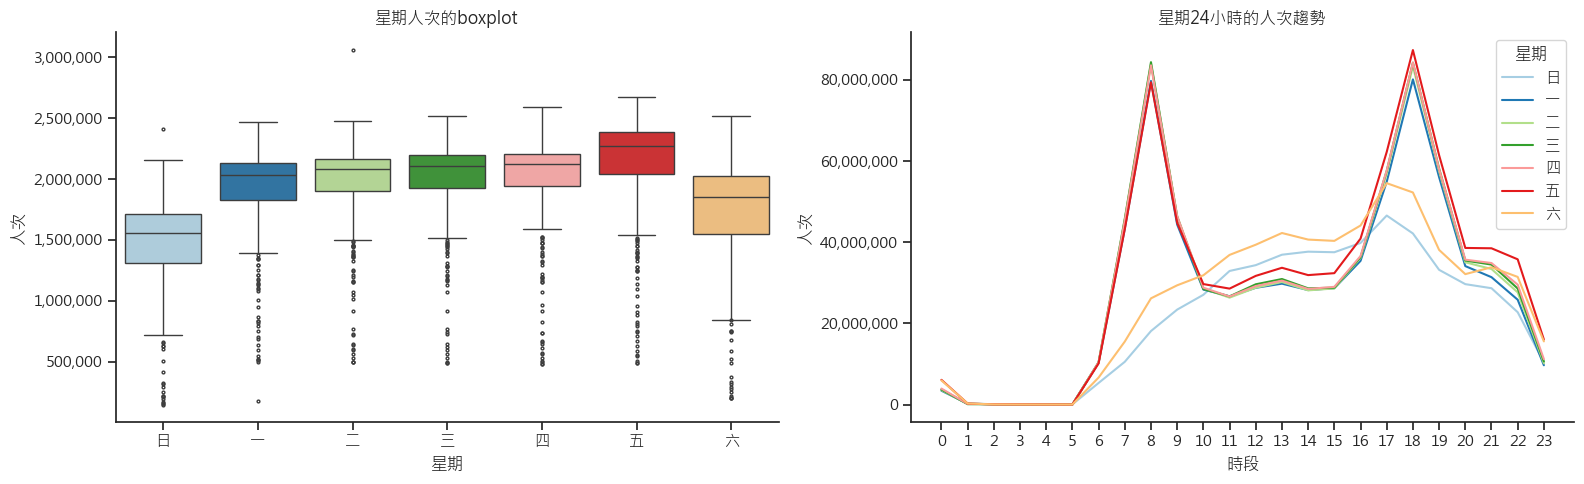

In [7]:
daily_hour['日期'] = pd.to_datetime(daily_hour['日期'], format='%Y-%m-%d')
daily_hour_holiday = pd.merge(daily_hour, holiday, left_on='日期', right_on='西元日期', how='left')

plot_hour_week(daily_hour_holiday, target='星期')

### 6.2 是否放假
- 是否放假的 boxplot
    - 更可以明顯的看出有放假的天數人次比沒放假(工作日)來的低。
- 是否放假24小時的人次趨勢
    - 沒放假(工作日)的趨勢與 周一至五一致，也與全部一起看的趨勢一致。
    - 有放假的人潮隨時間變晚而增加，17-18 達到高峰，後續下降。

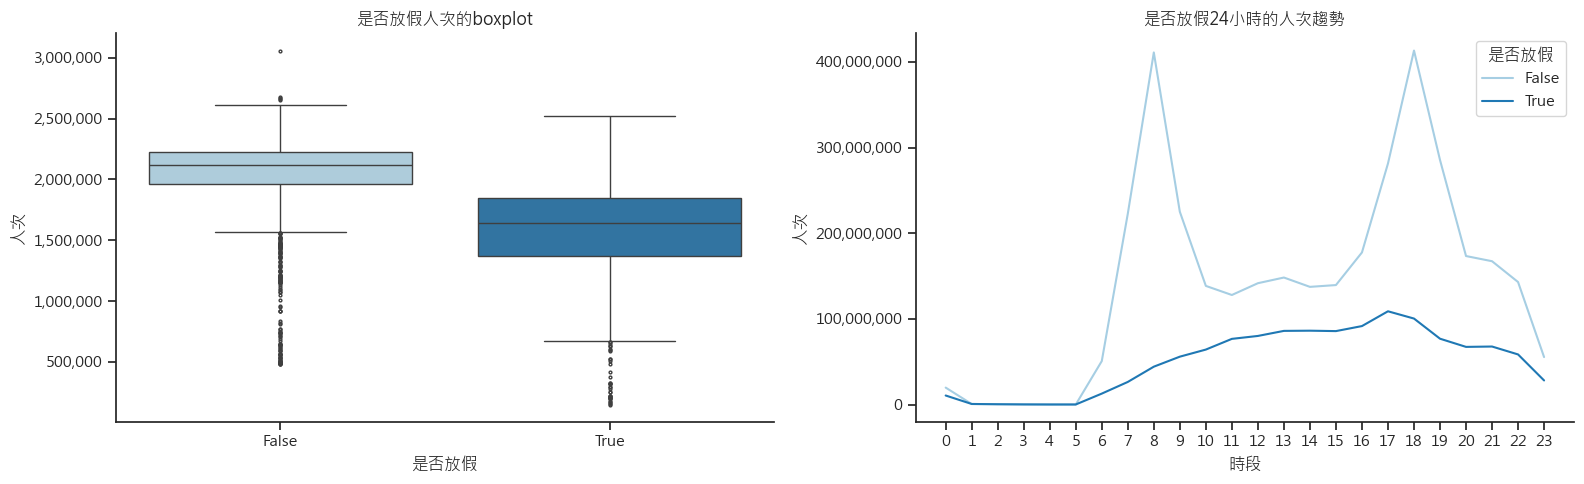

In [9]:
plot_hour_week(daily_hour_holiday, target='是否放假')

上述的推論皆是觀察得來的，接下來我們使用 ANOVA 來檢定。  

    - 關於"星期"的分析：
在星期之間的ANOVA分析中，我們發現了星期之間存在統計上的顯著差異（F-statistic: 107.066, p-value: 0.0）  
事後的Tukey HSD檢定結果表明，在星期之間有多個組合顯示出顯著差異（reject=True），  
例如星期一、三、五、六和四與其他星期之間都存在顯著差異，而星期二與星期一三四之間沒有顯著差異（reject=False）。

    - 關於"是否放假"的分析：
在星期之間的ANOVA分析中，我們發現了是否放假存在統計上的顯著差異（F-statistic: 796.445, p-value: 0.0）

綜合以上結果，可以得到以下結論：
- 在"星期"和"是否放假"方面，都存在統計上的顯著差異。
- 在"星期"方面，具體的差異情況是：大部分星期之間都有顯著差異，其中星期二與一三四之間沒有顯著差異。
- 在"是否放假"方面，"True"表示的組別與"False"表示的組別之間存在顯著差異。

In [10]:
group_columns = ['星期', '是否放假']
for group_column in group_columns:
    df_for_test = daily_hour_holiday.groupby([group_column,'日期'], as_index=False)['人次'].agg('sum')
    # 創建 AnovaAnalyzer class
    analyzer = AnovaAnalyzer(df_for_test, value_column='人次', group_column=group_column)
    analyzer.perform_anova()
    print(f"{group_column} 結果:")
    analyzer.display_result()
    analyzer.perform_posthoc()
    analyzer.display_posthoc()
    print('\n')

星期 結果:
F-statistic: 107.06575588827788
P-value: 2.68770273211277e-120
統計上有顯著差異，我們拒絕虛無假設
事後檢定結果:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
     一      三   89233.5171 0.0448    1133.0157  177334.0186   True
     一      二      60054.0 0.4067  -27984.6982  148092.6982  False
     一      五  211073.3935    0.0  122972.8921   299173.895   True
     一      六 -168948.2076    0.0 -257048.7091  -80847.7061   True
     一      四   92178.8879 0.0334    4078.3864  180279.3894   True
     一      日 -443515.0168    0.0  -531553.715 -355476.3186   True
     三      二  -29179.5171 0.9589 -117280.0186   58920.9843  False
     三      五  121839.8764 0.0009    33677.615  210002.1378   True
     三      六 -258181.7247    0.0 -346343.9861 -170019.4633   True
     三      四    2945.3708    1.0  -85216.8906   91107.6322  False
     三      日 -532748.5339    0.0

# 7. Y(人次) 與 日期 的趨勢
現在來看 Y 與 日期 有什麼樣的趨勢。  
在這邊不分車站的人次，單純看時間與人次的影響。  
我們將第一步下載的資料加總成每天的，並且合併在一起。

In [2]:
# 合併歷年資料，並計算成每日人次
raw_data_path = 'M:/gogoro/raw_data/'
# merged_to_daily(raw_data_path, group=['日期'], destination_folder = 'M:/gogoro/data/', file_name='daily_人次.csv')

# 讀取
daliy = pd.read_csv('M:/gogoro/data/daily_人次.csv')
daliy['日期'] = pd.to_datetime(daliy['日期'], format='%Y-%m-%d')

### 7.1 不同年每日的人次
整體來看，可以發現 2017, 2018, 2019 的趨勢都差不多，一年內都有一個穩定的波形上升下降再上升，但整體人數在 3 年中是持續上升的。  
而 2020 年的在前半年急速往下掉；2021年則在年中往下降；2022 年則是年初跟年中；2023年則回到類似 2017, 2018, 2019 的趨勢。  
推測這應 2020 到 2022 年的曲線應該是疫情影響導致。  
另外各別年來看，每年都會有一些 outlier 存在，且大部分的 outlier 都是往下掉的趨勢。

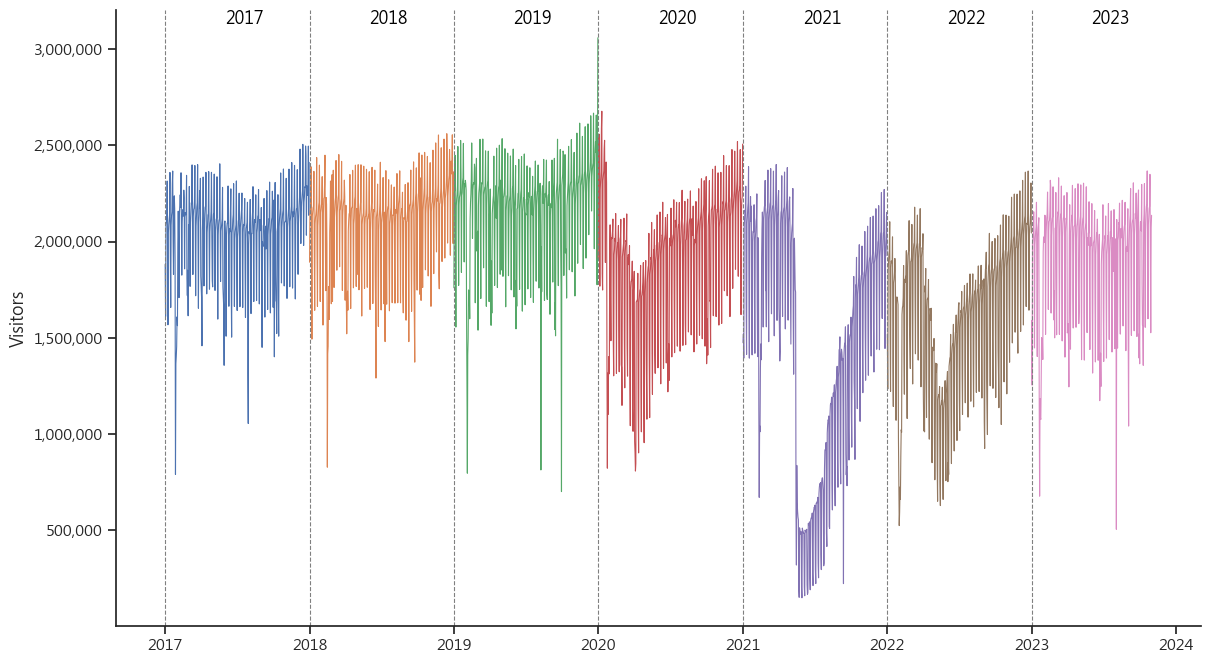

In [4]:
plot_line_chart_daily_all(daliy)

    - 異常點探討  

我使用 mean +- 1.96*std 的方法把每年的異常點找出來，並且在圖上標示出來(如下圖的紅色點)，  
值得注意的是這種作法在疫情期間(2020-2022)較難找出常態的異常點，不過這邊先暫時不看。    
可以發現到，每年年初時人次都會非常低，因此合理懷疑是農曆年帶來的效應，因此可以拿上面取得的政府公告的放假日來確認此假說。

Year 2017 - Abnormal Dates: [Timestamp('2017-01-27 00:00:00'), Timestamp('2017-01-28 00:00:00'), Timestamp('2017-01-29 00:00:00'), Timestamp('2017-01-30 00:00:00'), Timestamp('2017-02-01 00:00:00'), Timestamp('2017-04-04 00:00:00'), Timestamp('2017-05-30 00:00:00'), Timestamp('2017-06-04 00:00:00'), Timestamp('2017-06-18 00:00:00'), Timestamp('2017-07-29 00:00:00'), Timestamp('2017-07-30 00:00:00'), Timestamp('2017-09-03 00:00:00'), Timestamp('2017-10-04 00:00:00'), Timestamp('2017-10-10 00:00:00'), Timestamp('2017-10-15 00:00:00')]
Year 2018 - Abnormal Dates: [Timestamp('2018-01-07 00:00:00'), Timestamp('2018-02-04 00:00:00'), Timestamp('2018-02-15 00:00:00'), Timestamp('2018-02-16 00:00:00'), Timestamp('2018-02-17 00:00:00'), Timestamp('2018-02-20 00:00:00'), Timestamp('2018-04-05 00:00:00'), Timestamp('2018-06-18 00:00:00'), Timestamp('2018-06-24 00:00:00'), Timestamp('2018-07-11 00:00:00'), Timestamp('2018-09-02 00:00:00'), Timestamp('2018-09-09 00:00:00'), Timestamp('2018-09-23 00

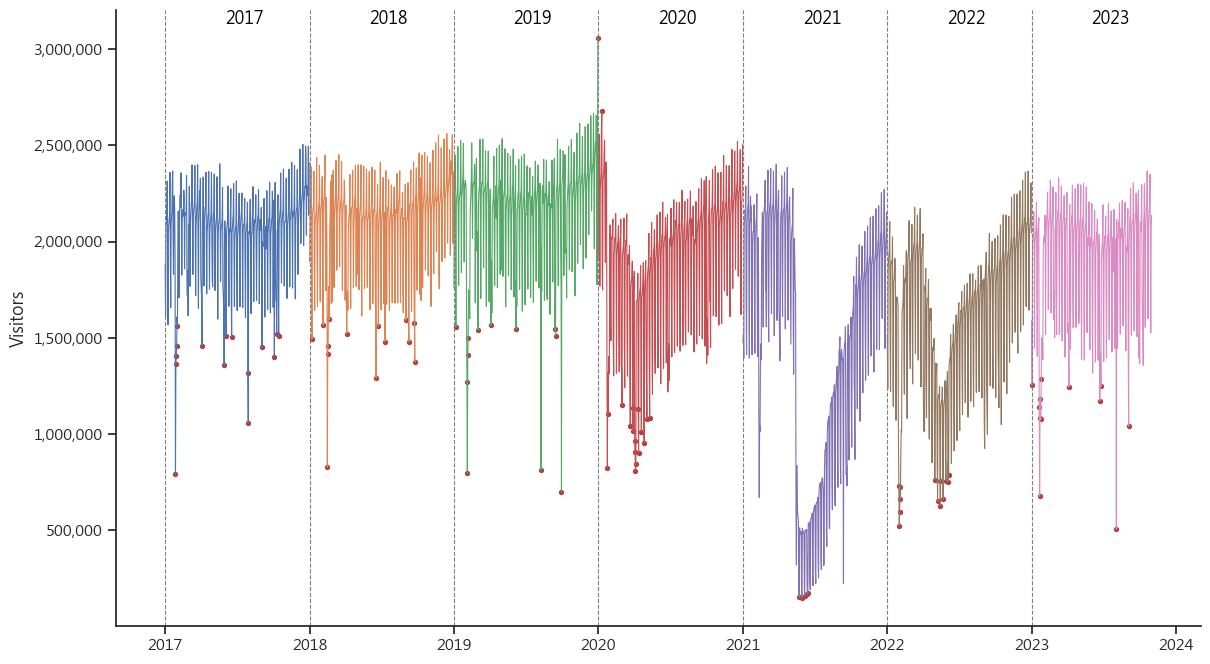

In [5]:
abnormal_df = find_outlier(daliy)
plot_line_chart_daily_all(daliy, abnormal_df, Mark_outliers=True)

### 7.2 加入是否有放假
接著我們再拿取上面從[中華民國政府行政機關辦公日曆表](https://data.gov.tw/dataset/14718)下載的節慶與放假資料。  
接著將每年的異常值來比對一下是否與節慶與假日有關。

首先我們先計算有多少異常點 '星期'，'是否放假'，'節日' 的三個分類中的那個細項。  
- 星期：
    - 可以看到大部分的異常點集中在周日，其他天則分布差不多。
- 是否放假：
    - 大部分的異常點都是在放假日，少部分是非放假日。
- 備註：
    - 滿多國定假日會造成人次下降或上升(大部分下降)，不過大多異常點集中非特殊節日中。

In [13]:
holiday.head()

西元日期 星期   是否放假     備註
0 2017-01-01  日   True  開國紀念日
1 2017-01-02  一   True     補假
2 2017-01-03  二  False    無特別
3 2017-01-04  三  False    無特別
4 2017-01-05  四  False    無特別

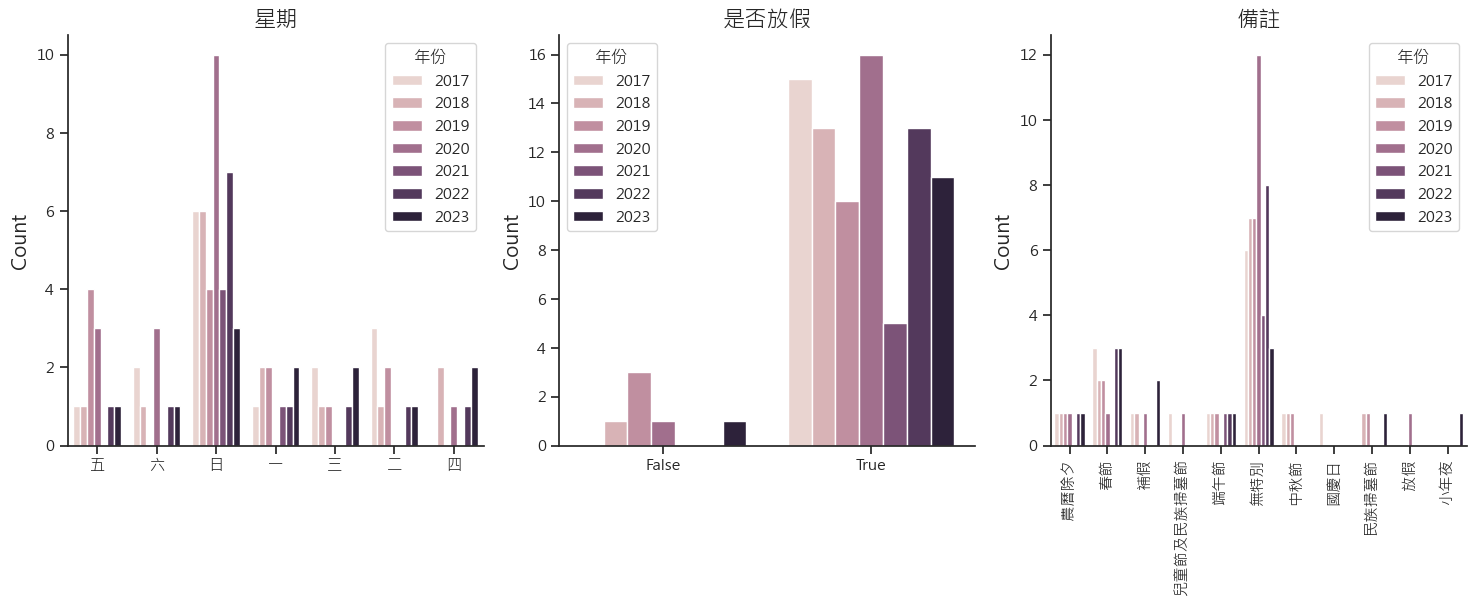

In [7]:
abnormal_holiday = pd.merge(abnormal_df, holiday, left_on='日期', right_on='西元日期', how='left')
plot_abnormal_isholiday(abnormal_holiday)

由上面分析可以看出滿多異常點的來源為何，我把有來源的異常點(有放假)標示在圖上藍色的點，無放假的標示為紅色，如下圖。  
此外我還未有明確原因的異常點詳細日期，也就是紅色的點。  
  
看到 2023 年的異常點剩 2023-08-03 還沒有明確原因，去搜尋後發現當天是颱風「卡努」的來襲，雙北皆停止上班上課。  
而 2019 年的異常點 2019-08-09 是「利奇馬」颱風；2019-09-30 則是「米塔」颱風，  
這兩天也皆有停班停課，因此可以得知颱風天與是否放颱風假是造成異常點的一個原因。  
因此我們在後續研究中加入颱風資訊，來探討颱風假是否會對人次造成影響。

Year 2018 - Abnormal Dates: [Timestamp('2018-07-11 00:00:00')]
Year 2019 - Abnormal Dates: [Timestamp('2019-08-09 00:00:00'), Timestamp('2019-09-30 00:00:00'), Timestamp('2019-12-31 00:00:00')]
Year 2020 - Abnormal Dates: [Timestamp('2020-01-10 00:00:00')]
Year 2023 - Abnormal Dates: [Timestamp('2023-08-03 00:00:00')]


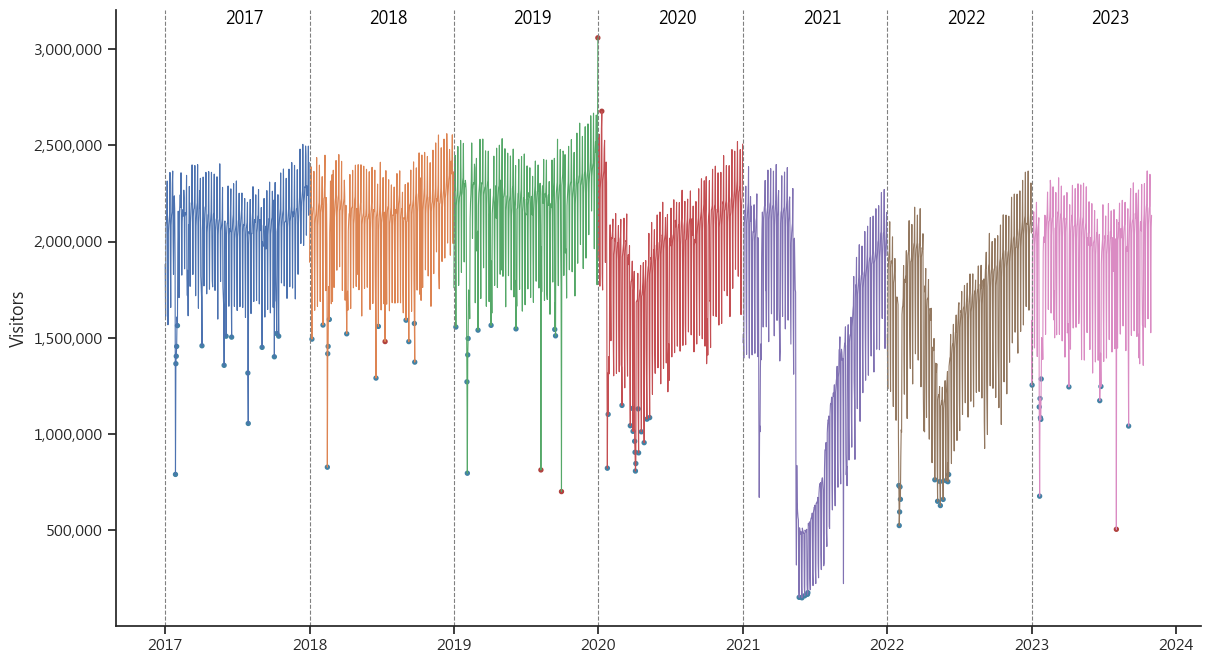

In [8]:
plot_line_chart_daily_all(daliy, abnormal_holiday, Mark_outliers=True, is_holiday=True)

### 7.3 加入颱風資訊
由於雙北颱風放假與否大多還是連動進行，因此這邊先以台北市有無放颱風假做為代表。  
因此我去 台北市政府人事處擷取表格資料 [歷次天然災害停班停課訊息](https://dop.gov.taipei/cp.aspx?n=72E3AB3DA4700EF6)  
擷取後的表格不能直接應用，因為表格中 是否放假 與 放假日期 寫在一起，且年份是民國年放在另外一個欄位中，  
因此我整理了擷取的 table，讓其能與捷運站進出量的表格類似。

In [12]:
# 從 台北市政府人事處 擷取表格資料，並存成 csv
url_to_scrape = "https://dop.gov.taipei/cp.aspx?n=72E3AB3DA4700EF6"
# crawler_Typhoon_info_to_csv(url_to_scrape, destination_folder='M:/gogoro/data/', file_name='Typhoon')

raw_Typhoon = pd.read_csv('M:/gogoro/data/Typhoon.csv')
Typhoon = scrape_date_Stop_work(raw_Typhoon)

display_side_by_side(
    (raw_Typhoon, '原始表格'),
    (Typhoon, '整理過後')
)

原始表格 
 
 
   
 年 
 天然災害名稱 
 臺北市停止上班上課情形 
 備註 
 
 
 
 
 0 
 112 
 卡努颱風 
 8月3日停止上班及上課。 
 nan 
 
 
 1 
 112 
 卡努颱風 
 8月4日照常上班及上課。 
 nan 
 
 
 2 
 111 
 軒嵐諾颱風 
 9月3日未達停止上班及上課標準。 
 nan 
 
 
 3 
 111 
 軒嵐諾颱風 
 9月4日未達停止上班及上課標準。 
 nan 
 
 
 4 
 110 
 璨樹颱風 
 9月11日照常上班及上課。 
 nan 
 
 
 

 
 整理過後 
 
 
   
 天然災害名稱 
 停止日期 
 是否停止上班上課 
 
 
 
 
 0 
 卡努颱風 
 2023-08-03 00:00:00 
 True 
 
 
 1 
 卡努颱風 
 2023-08-04 00:00:00 
 False 
 
 
 2 
 軒嵐諾颱風 
 2022-09-03 00:00:00 
 False 
 
 
 3 
 軒嵐諾颱風 
 2022-09-04 00:00:00 
 False 
 
 
 4 
 璨樹颱風 
 2021-09-11 00:00:00 
 False

接著在圖上把有颱風假的點(紫色)標示出來，並一樣輸出還未探討到原因異常點(紅色)。  
由以下資訊與圖可以看到，剩下 3 個異常點沒有找到原因，稍微快速搜尋可以發現：
- 2018-07-11：
    - 為瑪莉亞颱風來襲，但在 2018-07-10 放過颱風假，2018-07-11 則未放假。  
    - 可以推估還是颱風所導致。
- 2019-12-31：
    - 尚未找到原因，粗略推測是因為跨年，也有可能是選前跨年的造勢活動。
- 2020-01-10：
    - 為2020中華民國總統選舉前一夜，推測捷運人潮較平日高是因為這個原因。

Year 2018 - Abnormal Dates: [Timestamp('2018-07-11 00:00:00')]
Year 2019 - Abnormal Dates: [Timestamp('2019-12-31 00:00:00')]
Year 2020 - Abnormal Dates: [Timestamp('2020-01-10 00:00:00')]


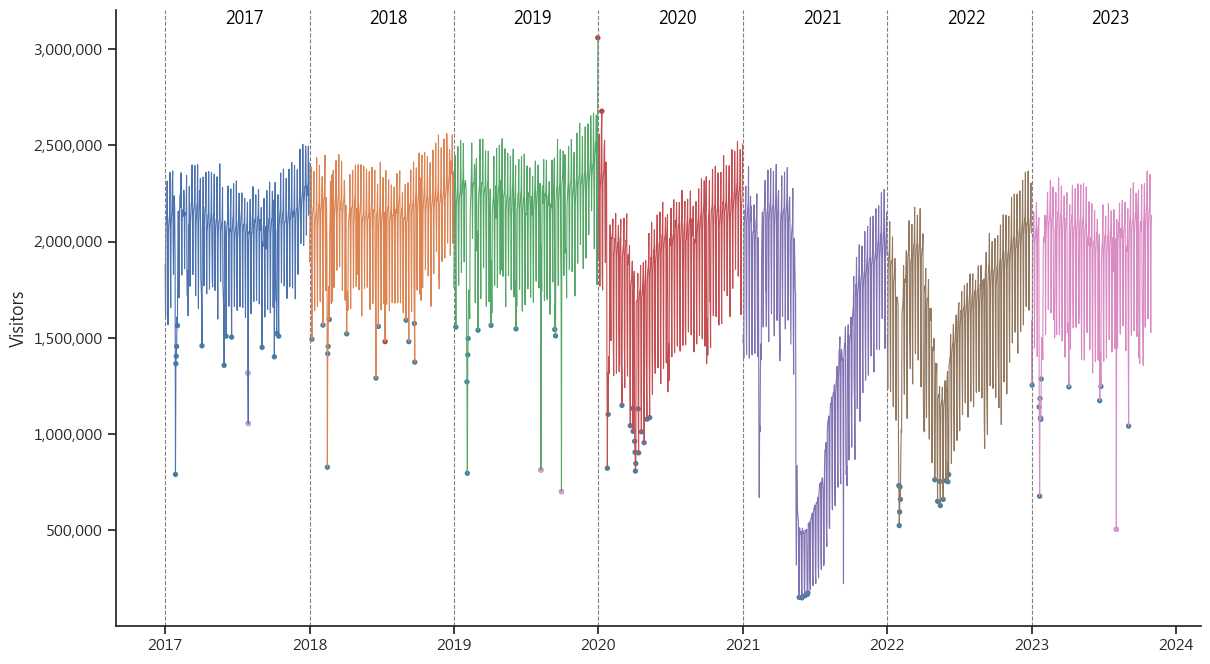

In [13]:
abnormal_holiday_Typhoon = merged_abnormal_typhoon(abnormal_holiday, Typhoon)
plot_line_chart_daily_all(daliy, abnormal_holiday_Typhoon, Mark_outliers=True, is_holiday=True, is_Typhoon=True)

總結至此，捷運每日人次的異常點主要可以由幾項原因導致：
1. 節慶如春節會導致人次下降
2. 放假日可以解釋大多數的異常點
3. 颱風來襲會導致人次下降
4. 特殊事件如選舉夜會導致人次上升

### 7.4 疫情影響
上述提到 2020 到 2022 的每天人次趨勢很不一樣，因此我們來看看疫情對於人次的影響，  
我去[衛福部疾管署](https://covid-19.nchc.org.tw/api.php?dt_name=8&city=%E5%85%A8%E5%9C%8B&town=%E5%85%A8%E5%8D%80)下載每日確診人數。

In [3]:
covid = pd.read_csv('M:/gogoro/data/2023-cdc-Day_Confirmation_Age_County_Gender_19CoV_v1_全國_全區.csv')
covid['個案研判日'] = pd.to_datetime(covid['個案研判日'], format='%Y-%m-%d')
covid.tail()

UID      個案研判日 縣市別  區域  新增確診人數  累計確診人數  七天移動平均新增確診人數
1021  135292 2020-01-28  全國  全區       3       8          1.14
1022  135297 2020-01-27  全國  全區       1       5          0.71
1023  135300 2020-01-26  全國  全區       1       4          0.57
1024  135303 2020-01-24  全國  全區       2       3          0.43
1025  135306 2020-01-22  全國  全區       1       1          0.14

    - 這邊我們可以結合三張圖來探討疫情的影響
1. 每日的搭乘人次與確診人數圖
2. 每月的搭乘人次與確診人數圖
3. 別人整理的疫情每月人數與重要事件

由資料上可以看到，第一筆一確診案例是在 2020-01-22 出現的，而圖上可以同步看到，  
第一筆確診案例出現後，捷運搭乘人次往下掉了一大截，下降趨勢一直持續到 4 月左右，才轉為上升。  
由 圖3 可以看到是因為確診如數在 4 月後就控制住，沒有持續延燒，大家才又敢去搭捷運。  
而 202105 時每日搭乘人次跌落到 500,000 內，是由於三級警戒所導致，  
202203 人數要劇烈下降，持續到 202205 左右，由 圖1 可以看出，是因為本土案例大量爆發導致。

總結來說，疫情剛出現，或久沒出現又發現時，會造成民眾搭乘意願劇烈下降，過一會後便會逐漸回復，  
這個循環在本次案例中出現了 3 次，分別在 202004, 202105, 202204，  
之後在出現大爆發時，便沒有再對人次造成劇烈影響，因此推斷每次爆發的時間應為重要的時程，  
且爆發的次數與民眾的恐慌(疫苗覆蓋率)也可以納入考量。  


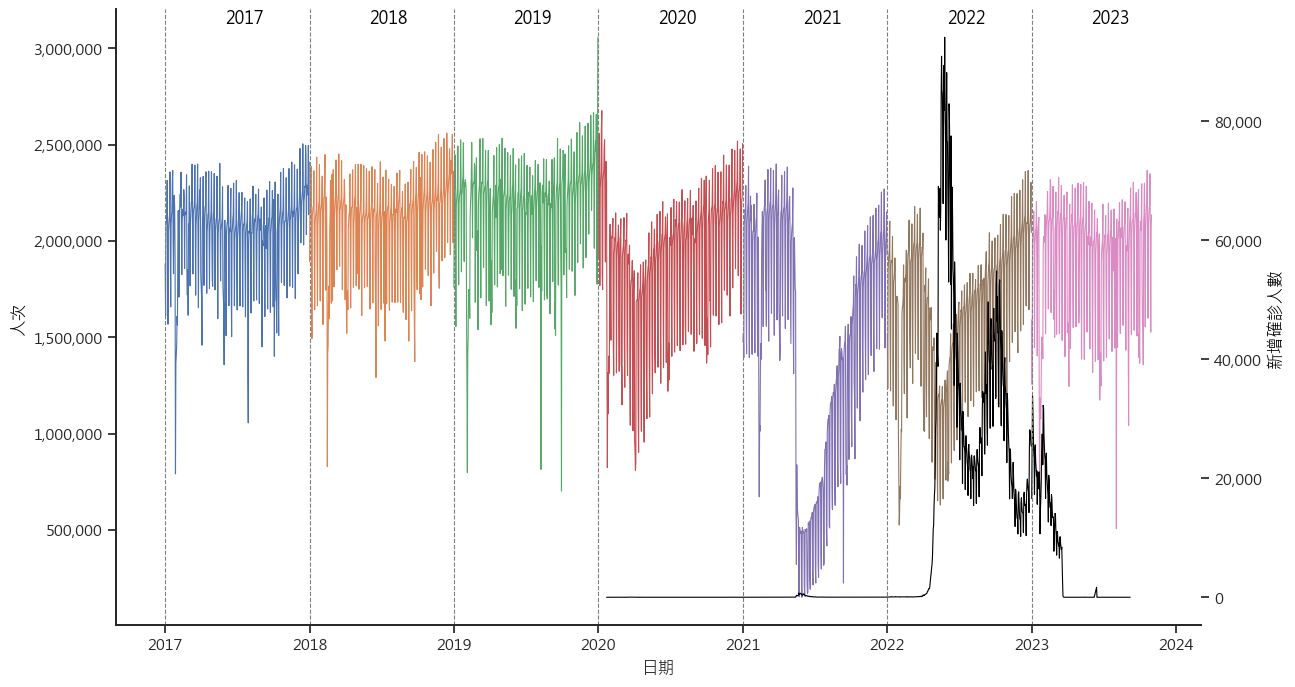

In [4]:
daliy_covid = pd.merge(daliy, covid, left_on='日期', right_on='個案研判日', how='left')
plot_line_chart_daily_covid(daliy_covid, '新增確診人數')

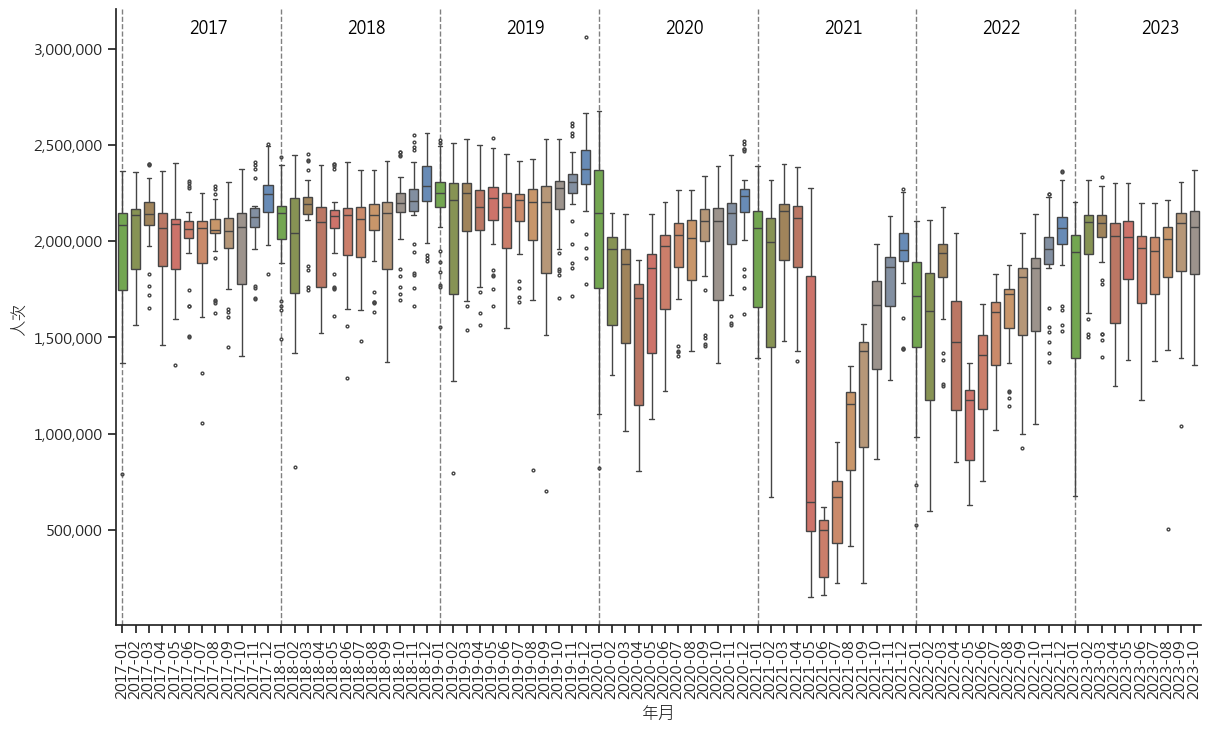

In [5]:
plot_boxplot_monthly(daliy_covid)

<img src="./png/covid.png" alt="isolated" width="600"/>

### 7.5 季節的影響
由以上的圖可以看到，人次在每年的趨勢是有一個波動存在，  
1 月都較低，一直持續上升到 3 月，之後 4 月會下降，5 月則上升，  
接下來大部分一路下降到 8 月，之後再一路上升到 12 月，且每年 12 月的人次都是最高的。  

因此我們來探討每季(春夏秋冬)是否對人次造成影響，  
這邊的探討先把受疫情影響的年份去掉，我們選用 2017-2019 來分析。

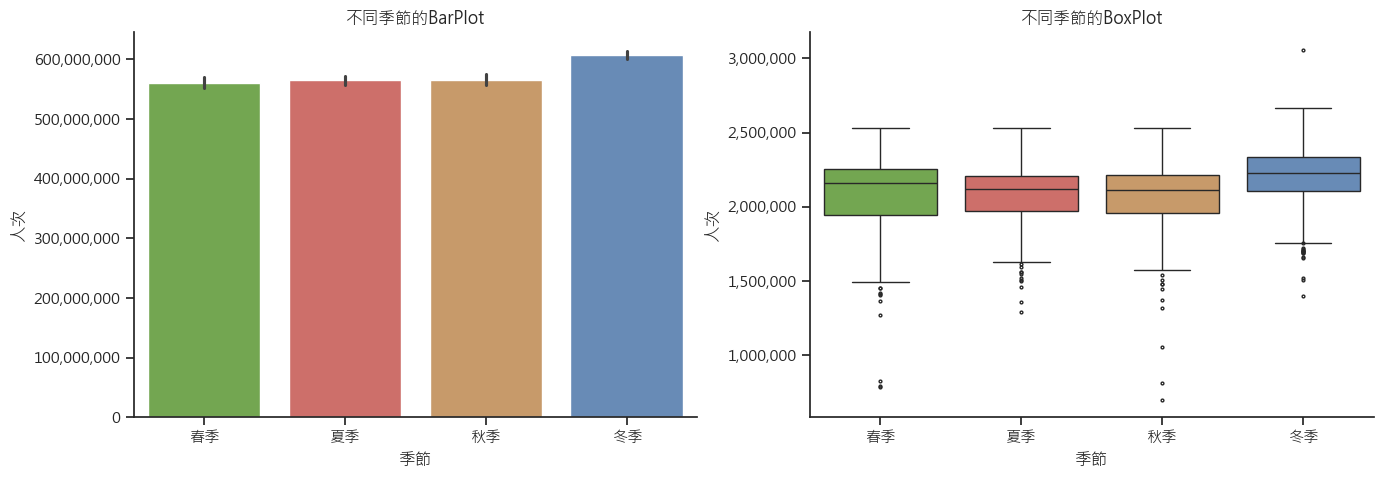

<Figure size 1600x500 with 0 Axes>

In [3]:
daliy['quarter'] = daliy['日期'].dt.quarter
daliy_no_covid = daliy[daliy['日期'] < '2020']
plot_quarter_visitor(daliy_no_covid)

接著一樣使用 ANOVA 來看季節是否對人次有影響，  
在四個季節（春、夏、秋、冬）之間存在統計上的顯著差異（ANOVA P-value < 0.05）。  
  
經過事後檢定（Tukey HSD檢定），以下季節之間有顯著差異：
- 春季與冬季之間
- 夏季與冬季之間
- 秋季與冬季之間

簡而言之，冬季與其他季節之間存在顯著差異，而其他季節之間則沒有顯著差異。  
由此推知四季應也是一個有用的解釋變數。  

In [4]:
group_columns = ['quarter']
for group_column in group_columns:
    # 創建 AnovaAnalyzer class
    analyzer = AnovaAnalyzer(daliy_no_covid, value_column='人次', group_column=group_column)
    analyzer.perform_anova()
    print(f"{group_column} 結果:")
    analyzer.display_result()
    analyzer.perform_posthoc()
    analyzer.display_posthoc()

quarter 結果:
F-statistic: 20.1582622171
P-value: 1.0172271951619477e-12
統計上有顯著差異，我們拒絕虛無假設
事後檢定結果:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     1      2  -8576.4807 0.9795 -64838.2687  47685.3074  False
     1      3 -26767.9654 0.6095 -82877.5068  29341.5761  False
     1      4 124203.2593    0.0  68093.7178 180312.8007   True
     2      3 -18191.4847 0.8371 -74144.9681  37761.9987  False
     2      4 132779.7399    0.0  76826.2565 188733.2233   True
     3      4 150971.2246    0.0   95170.829 206771.6202   True
---------------------------------------------------------------


# 8. 加入氣溫與雨量
接著我們來看氣溫與雨量對於捷運搭乘人次是否會有影響，  
我去[氣象局測站](https://opendata.cwa.gov.tw/index)下載測站資料，並移除了異常值的狀況。  

異常值主要為以下幾種情況：
1. 溫度、雨量、風速：超出歷史紀錄
2. 溫度、雨量、濕度、風速、風向、大氣壓、日照時數：不在正常值域內
3. 日照時數：冬天日照卻很長之類的(超出日落-日出之時間長度)

例外之情形：
- 雨量、風速的異常值：突然的極端值、雨量因記錄中斷問題被累計為一筆之類的。  
- 目前沒有一個很標準的方法處理，不易區分正常/錯誤的資料。
- 若有疑慮可以直接移除有問題的測站整天的資料，目前暫時都沒有移除。

下載的資料有點大，我將經過上述處理後的資料放在 Meteorology_201701-202310/ 中。  
首先我們先來看一下氣象測站站點的分布狀態，我們這邊只選用 '臺北市' 或 '新北市' 的站點。

In [3]:
stations_info = pd.read_csv('Meteorology_data/Stations_info.csv')
stations_info = stations_info[stations_info['City'].isin(['臺北市', '新北市'])]
stations_info = stations_info[['StID', 'Longitude', 'Latitude', 'City']]
stations_info.head()

StID  Longitude  Latitude City
2  466850   121.7812   25.0712  新北市
3  466880   121.4420   24.9976  新北市
4  466881   121.5200   24.9593  新北市
5  466900   121.4489   25.1649  新北市
6  466910   121.5297   25.1826  臺北市

接著我們在圖上呈現站點分布，藍色的為'臺北市'的站點，粉色為'新北市'的站點。  

In [11]:
plot_map(stations_info=stations_info)

我們再加上前面畫過的捷運路線與站點圖，可以看到一氣象測站站點的分布還不錯，  
有涵蓋到大部分的捷運區域。

In [10]:
plot_map(MRT_info=MRT_info, stations_info=stations_info)

看完站點分布後，我們加入氣象測站資料，原始資料為每小時，測量的內容非常廣泛，且站點的遍布全台，因此資料較大，  
我處理過以便縮小資料：
- 選用站點為 '臺北市'與'新北市'
- 測量資料僅留下氣溫與雨量
- 轉為每天

得到 '臺北市'與'新北市' 每天各站點的氣溫雨量資料後，我使用 Ordinary Kriging 插值，  
得到各捷運站點的每日平均氣溫與累積雨量。  
這是一個相對簡單的方法，後續可以使用 buffer 的方式，在捷運站點畫 2-3 公里圓，再計算平均，  
這樣得到的氣溫雨量較能反映真正捷運搭乘客的體驗。

In [5]:
Meteorology_Daily = pd.read_csv('Meteorology_data/Meteorology_Daily.csv', low_memory=False)
meteorology_stations = pd.merge(Meteorology_Daily, stations_info, how='left', left_on='stno', right_on='StID')
MRT_stations = MRT_info[['捷運站名稱', '經度', '緯度']].drop_duplicates()

# kriging_interpolation(meteorology_stations, MRT_stations, destination_folder = 'M:/gogoro/meteorology_data/', file_name='Kriging_result.csv') #83m54s
MRT_meteorology = pd.read_csv('Meteorology_data/Kriging_result_station_0.csv')
MRT_meteorology['Date'] = pd.to_datetime(MRT_meteorology['Date'], format='%Y-%m-%d')
MRT_meteorology.head()

Date   Longitude   Latitude  temperature  rainfall 捷運站名稱
0 2017-01-01  121.542854  24.975968    21.788775  0.016843    七張
1 2017-01-01  121.529923  24.972498    21.848481  0.044416   小碧潭
2 2017-01-01  121.452613  24.998687    22.570918  0.000000  亞東醫院
3 2017-01-01  121.459183  25.008864    22.854661  0.005485    府中
4 2017-01-01  121.463279  25.014339    22.955913  0.008923    板橋

使用前面用過的 daliy_entry_MRT 來合併。

In [7]:
daliy_entry_MRT_meteorology = merged_Meteorology_to_ori_data(daliy_entry_MRT, MRT_meteorology)
daliy_entry_MRT_meteorology.head()

日期    進站     人次 Line IDs       Date   Longitude   Latitude  \
0 2017-01-01  BL板橋  42135       BL 2017-01-01  121.463279  25.014339   
1 2017-01-02  BL板橋  37391       BL 2017-01-02  121.463279  25.014339   
2 2017-01-03  BL板橋  35362       BL 2017-01-03  121.463279  25.014339   
3 2017-01-04  BL板橋  35019       BL 2017-01-04  121.463279  25.014339   
4 2017-01-05  BL板橋  35306       BL 2017-01-05  121.463279  25.014339   

   temperature  rainfall  
0    22.955913  0.008923  
1    21.315088  0.000000  
2    19.342619  0.981982  
3    21.331021  0.008796  
4    20.543489  0.000230

我們看一下 溫度雨量 與 人次 的 Scatter plot，由圖上可以看到：
- 溫度
    - 低於 10 度左右時時，搭乘人次明顯較高於 10 度來的低。
    - 30 度以上時，也有隨著溫度越高人次越低的趨勢
- 雨量
    - 雨量不大時，對人次的影響不大。
    - 大致可以看出，雨量越高時，總搭乘的人次越低。

In [8]:
plot_weather_scatter(daliy_entry_MRT_meteorology)

由上面的推論，我新增兩個新的變數：溫度級別、雨量級別，它們分別的意思如下：  

- 溫度級別
    - <10
    - 10~20
    - 20~30
    - \>30

- 雨量級別：融合 世界氣象組織制定 的雨量分級與 交通部中央氣象局 的雨量分級。
    - 0：無雨
    - 0~10：小雨
    - 10~80：中雨
    - 80~239：大雨
    - 240~349：豪雨
    - 350~500：大豪雨
    - 500以上： 超大豪雨
  
這邊單純看每天的差異，避免車站變異造成的影響。

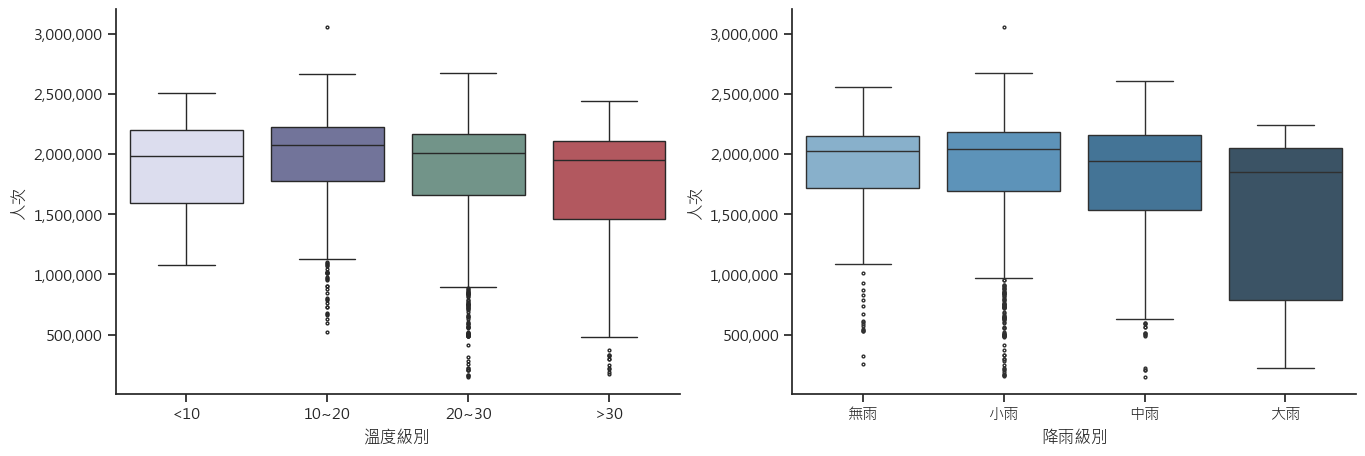

In [9]:
daliy_MRT_meteorology = daliy_entry_MRT_meteorology.groupby('日期').agg({'人次': 'sum', 'temperature': 'mean', 'rainfall': 'mean'}).reset_index()
daliy_MRT_meteorology['temperature_level'] = daliy_MRT_meteorology['temperature'].apply(temperature_level)
daliy_MRT_meteorology['rainfall_level'] = daliy_MRT_meteorology['rainfall'].apply(rainfall_level)
plot_weather_box(daliy_MRT_meteorology)

接著一樣跑 ANOVA 看一下不同組別間是否有差異。  

    - 溫度級別
F-statistic（F統計值）為23.44，P-value 為5.87e-15，因此我們拒絕虛無假設，即溫度水平之間存在顯著差異。  

多重比較中使用了Tukey HSD方法作為事後檢定結果，顯著水準（FWER）為0.05。  
除了 <10 度的組合雨別人都沒有顯著差異外，其他組別都拒絕了虛無假設，表示它們的平均值差異顯著。


    - 雨量級別
F-statistic（F統計值）為11.35，P-value（P值）為2.14e-07，因此我們拒絕虛無假設，即降雨水準之間存在顯著差異。

多重比較中使用了Tukey HSD方法作為事後檢定結果，顯著水準（FWER）為0.05。  
除了無雨vs小雨沒有顯著差異外，其他組別都拒絕了虛無假設，表示它們的平均值差異顯著。


In [11]:
group_columns = ['temperature_level', 'rainfall_level']
for group_column in group_columns:
    # 創建 AnovaAnalyzer class
    analyzer = AnovaAnalyzer(daliy_MRT_meteorology, value_column='人次', group_column=group_column)
    analyzer.perform_anova()
    print(f"{group_column} 結果:")
    analyzer.display_result()
    analyzer.perform_posthoc()
    analyzer.display_posthoc()
    print('\n')

temperature_level 結果:
F-statistic: 23.437570691712
P-value: 5.873428529468231e-15
統計上有顯著差異，我們拒絕虛無假設
事後檢定結果:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
 10~20  20~30 -102373.1668    0.0  -152811.219  -51935.1147   True
 10~20    <10  -72573.2131 0.9549 -433171.4401  288025.0138  False
 10~20    >30 -267986.8262    0.0 -353219.6456 -182754.0067   True
 20~30    <10   29799.9537 0.9966 -329652.9605  389252.8679  False
 20~30    >30 -165613.6593    0.0 -245862.9568  -85364.3618   True
   <10    >30  -195413.613 0.5166 -561374.0398  170546.8137  False
------------------------------------------------------------------


rainfall_level 結果:
F-statistic: 11.35356298951899
P-value: 2.1448431601935175e-07
統計上有顯著差異，我們拒絕虛無假設
事後檢定結果:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower    

# 8. Model
上面 EDA 的分析都是單獨看各別變數，沒有考慮到變數之間的相關性，  
如果需要一次探討，可以考慮使用 poisson regression 來看在固定其他變數下，某變數是否還是顯著。  
而在這邊我主要是想建立一個準確的預測模型，因此我們直接拿以上得到的結論，  
來預測 **每小時各捷運站的人次**，由於疫情的影響要做進一步的處理，  
因此我們選用 2017~2019 年的資料來預測以及驗證我們選用的變數。

1. 捷運路線
2. 日期延伸：
    1. 年份
    2. 季節
    3. 月份
    4. 星期
3. 是否放假
4. 颱風假
5. 疫情
6. 氣溫級別
7. 雨量級別


In [2]:
daily_hour_entry = pd.read_csv('M:/gogoro/data/daily_hour_進站_人次.csv')

# 加入捷運路線資訊
MRT_info = process_and_merge_MRT_info('M:/gogoro/data/臺北捷運車站出入口座標.csv', 'M:/gogoro/data/捷運路線圖_臺北捷運.csv', 'M:/gogoro/data/捷運路線圖_新北捷運.csv')
data_for_model = merged_MRT_info_with_ori_data(daily_hour_entry, MRT_info)
data_for_model['日期'] = pd.to_datetime(data_for_model['日期'], format='%Y-%m-%d')

# 加入放假與星期資訊
holiday = pd.read_csv('M:/gogoro/data/holiday.csv')
holiday['西元日期'] = pd.to_datetime(holiday['西元日期'], format='%Y%m%d')
data_for_model = pd.merge(data_for_model, holiday, left_on='日期', right_on='西元日期', how='left')

# 加入颱風假資訊 
raw_Typhoon = pd.read_csv('M:/gogoro/data/Typhoon.csv')
Typhoon = scrape_date_Stop_work(raw_Typhoon)
Typhoon['停止日期'] = pd.to_datetime(Typhoon['停止日期'], format='%Y-%m-%d')
data_for_model = merged_abnormal_typhoon(data_for_model, Typhoon)

# 加入溫度雨量資訊
MRT_meteorology = pd.read_csv('Meteorology_data/Kriging_result_station_0.csv')
MRT_meteorology['Date'] = pd.to_datetime(MRT_meteorology['Date'], format='%Y-%m-%d')
data_for_model = merged_Meteorology_to_ori_data(data_for_model, MRT_meteorology)

# 處理欄位
data_for_model['temperature_level'] = data_for_model['temperature'].apply(temperature_level)
data_for_model['rainfall_level'] = data_for_model['rainfall'].apply(rainfall_level)
data_for_model['quarter'] = data_for_model['日期'].dt.quarter
data_for_model['month'] = data_for_model['日期'].dt.month
data_for_model['year'] = data_for_model['日期'].dt.year
data_for_model['dayofyear'] = data_for_model['日期'].dt.dayofyear

columns_to_drop = ['備註', 'Longitude', 'Latitude', '天然災害名稱', 'Date', 'temperature', 'rainfall']
data_for_model.drop(columns=columns_to_drop, inplace=True)
data_for_model = data_for_model[data_for_model['year']<2020]

我這邊使用 Catboost 來建模，驗證方式採用 Backtesting 中的 Expanding Window，  
由於計算時間的問題，僅使用最後一個月的 30 天來驗證。  

備註: 模型有使用 GPU 加速

In [3]:
data = data_for_model.copy()
category = ['進站', 'Line IDs', '星期', '是否放假', '是否停止上班上課', 'temperature_level', 'rainfall_level']
y_col = ['人次']
numeric = list(set(data.columns) - set(category))

for colname in category:
    data[colname] = data[colname].astype('str')

data_dropna = data.dropna(subset=['人次'])
test_time_range = split_backtest(data_dropna, time=30, day=1, date_col='日期')
# predict_result = backtest_predict(data_dropna, test_time_range) # 有用GPU加速，127m

接下來呈現 Backtesting 的結果，我們每前進一步就預測一個新的模型，重複30次：

In [19]:
predict_result = pd.read_csv('M:/gogoro/data/model_predict.csv')
plot_model_real_predict(predict_result)

In [ ]:
X, y = split_X_y(data_dropna, y_col=['人次'], date_col='日期')
categorical_indicies = get_categorical_indicies(X)
train_dataset = cb.Pool(X, y, cat_features=categorical_indicies)

model = cb.CatBoostRegressor(iterations=3000,
                             task_type="GPU")
model.fit(train_dataset)

In [7]:
feature_importanceg = plot_feature_importance(model.get_feature_importance(), X.columns, 'CATBOOST')

In [9]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap.plots.bar(shap_values)

由 Feature Importance 跟 shap 的結果都可以看到，24小時時段是最重要的變數，其次每個捷運站的性質差異也很大，  
而由外部資料加入的捷運站的路線與是否放假占了很大的比率。  
是否停止上班上課(颱風假)與 雨量等級應該有一定程度的相關性，因此兩個變數的重要性互相影響。  
而季節的效應是所有變數中最低的，猜測應該是月份的資訊就能提供那部分變異的解釋。

# 9. 商業價值
資料的探索、模型的預測都應該是為了某種目的行動，  
因此這邊我提出幾個如果能準確預測 **每小時各捷運站的人次** 所帶來的潛在商業價值：

1. 優化車輛分佈：  
根據捷運站點的乘客流量預測，可以合理地分配電動摩托車到不同的捷運站點，以確定在不同站點和時間段應該部署多少輛電動摩托車，  
例如在繁忙站點提供更多車輛，確保在高需求時段和地點提供足夠的車輛供顧客租用，以滿足他們的需求。

2. 提高營運效率：  
透過精確的乘客數量預測，可以更好地規劃車輛的維護和充電需求，在低需求時段進行，  
以最大程度地減少停機時間，並確保車輛在高需求時段保持運作狀態。

3. 增加收入：  
製定動態的價格策略，例如在高峰時段提高租金，以最大程度地提高收入。  
此外，還可以提供訂購服務，使顧客可以提前預訂車輛，確保在需要時能夠獲得電動摩托車。

4. 提供更好的使用者體驗：  
透過在高需求地點提供足夠的車輛，並減少等待時間，可以提供更好的使用者體驗，吸引更多的顧客並提高他們的滿意度。

5. 數據分析和決策支援：  
乘客數量預測數據可以用於更深入的分析，幫助了解不同站點和時間段的市場趨勢。  
幫助做出更明智的業務決策，例如選擇新的營運區域或投資更多的車輛。

----
一個類似的實際案例是共享單車服務商如 Mobike 或 Ofo。  
這些公司利用數據分析來預測在城市不同區域的需求變化，並據此調整自行車的分佈。  
他們分析各種因素，如天氣、假日、城市活動等，來預測特定時段和地點的需求變化，並據此優化車輛的分佈和維護策略。  
這種策略不僅提高了用戶滿意度，還提高了營運效率和獲利能力。

# X. 其他
想到還可以加入的資訊：
- 有無轉乘
- 路線 排序
- OD 移動距離
- 疫情對於 OD移動距離的影響
- 人口(居住區、商業區)
    - 工作人口
    - 在地人口
- 手機令號
- FDA (functional data analysis)

# Reference

- [臺北捷運各站分時進出量統計](https://data.taipei/dataset/detail?id=1d71c478-205f-42c5-8386-35f86d74fdd1)
- [台北捷運API-捷運路線資料](https://www.metro.taipei/cp.aspx?n=BDEB860F2BE3E249)
- [中華民國政府行政機關辦公日曆表](https://data.gov.tw/dataset/14718)  
- [台北市歷次天然災害停班停課訊息](https://dop.gov.taipei/cp.aspx?n=72E3AB3DA4700EF6)
- [衛福部疾管署](https://covid-19.nchc.org.tw/api.php?dt_name=8&city=%E5%85%A8%E5%9C%8B&town=%E5%85%A8%E5%8D%80)
- [氣象局測站](https://opendata.cwa.gov.tw/index)
